In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

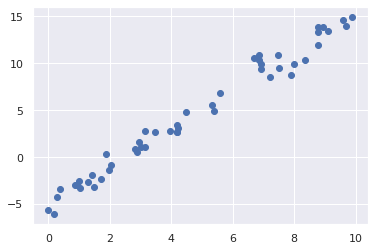

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

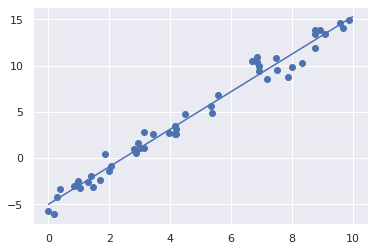

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print(model.coef_[0])
print(model.intercept_)

2.027208810360695
-4.998577085553202


In [5]:
rng.rand(50)

array([0.93259546, 0.69681816, 0.06600017, 0.75546305, 0.75387619,
       0.92302454, 0.71152476, 0.12427096, 0.01988013, 0.02621099,
       0.02830649, 0.24621107, 0.86002795, 0.53883106, 0.55282198,
       0.84203089, 0.12417332, 0.27918368, 0.58575927, 0.96959575,
       0.56103022, 0.01864729, 0.80063267, 0.23297427, 0.8071052 ,
       0.38786064, 0.86354185, 0.74712164, 0.55624023, 0.13645523,
       0.05991769, 0.12134346, 0.04455188, 0.10749413, 0.22570934,
       0.71298898, 0.55971698, 0.01255598, 0.07197428, 0.96727633,
       0.56810046, 0.20329323, 0.25232574, 0.74382585, 0.19542948,
       0.58135893, 0.97001999, 0.8468288 , 0.23984776, 0.49376971])

In [6]:
rng.randn(50)

array([ 1.12141771,  0.40890054, -0.02461696, -0.77516162,  1.27375593,
        1.96710175, -1.85798186,  1.23616403,  1.62765075,  0.3380117 ,
       -1.19926803,  0.86334532, -0.1809203 , -0.60392063, -1.23005814,
        0.5505375 ,  0.79280687, -0.62353073,  0.52057634, -1.14434139,
        0.80186103,  0.0465673 , -0.18656977, -0.10174587,  0.86888616,
        0.75041164,  0.52946532,  0.13770121,  0.07782113,  0.61838026,
        0.23249456,  0.68255141, -0.31011677, -2.43483776,  1.0388246 ,
        2.18697965,  0.44136444, -0.10015523, -0.13644474, -0.11905419,
        0.01740941, -1.12201873, -0.51709446, -0.99702683,  0.24879916,
       -0.29664115,  0.49521132, -0.17470316,  0.98633519,  0.2135339 ])

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(x, [1.5, -2, 1.])

model.fit(x, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


In [8]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

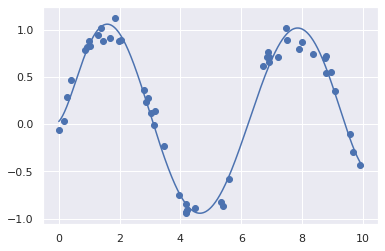

In [10]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + .1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y);
plt.plot(xfit, yfit);

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, x, y=None):
        self.centers_ = np.linspace(x.min(), x.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, x):
        return self._gauss_basis(x[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)

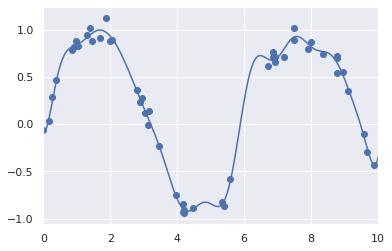

In [12]:
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

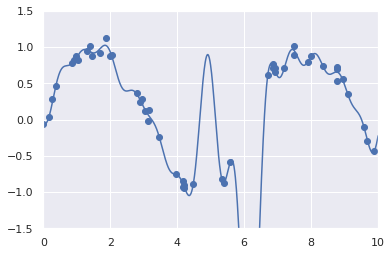

In [13]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [16]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0, 10))

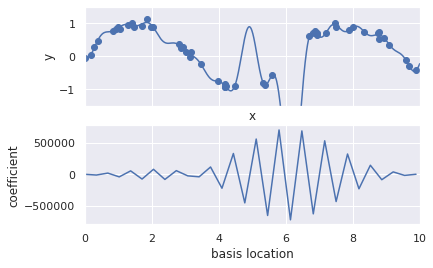

In [17]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

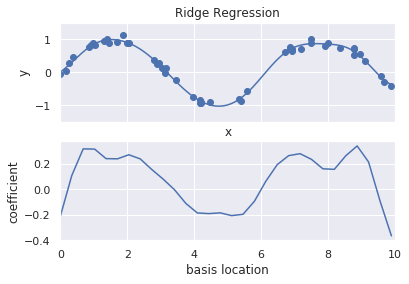

In [18]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704898322, tolerance: 0.002065280097246271
  positive)


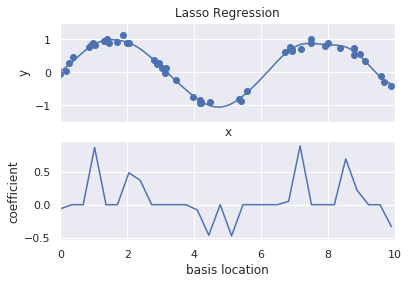

In [19]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=.001))
basis_plot(model, title='Lasso Regression')

In [20]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [21]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [22]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [23]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [24]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


(8, 17)

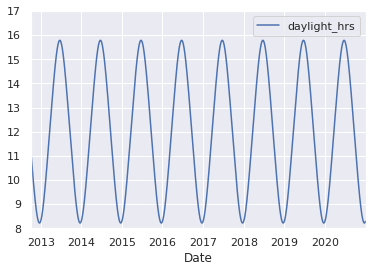

In [25]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
plt.ylim(8, 17)

In [26]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp(C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp(C)', 'dry day']])

In [27]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [28]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp(C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [29]:
daily.dropna(axis=0, how='any', inplace=True)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp(C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [30]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs',
               'PRCP', 'dry day', 'Temp(C)', 'annual']

x = daily[column_names]
y = daily['Total']

print(x.head())
print(y.head())

            Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  PRCP  \
Date                                                                         
2012-10-03  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   0.0   
2012-10-04  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   0.0   
2012-10-05  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   0.0   
2012-10-06  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   0.0   
2012-10-07  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0     11.045208   0.0   

            dry day  Temp(C)    annual  
Date                                    
2012-10-03      1.0    13.35  0.000000  
2012-10-04      1.0    13.60  0.002740  
2012-10-05      1.0    15.30  0.005479  
2012-10-06      1.0    15.85  0.008219  
2012-10-07      1.0    15.85  0.010959  
Date
2012-10-03    14084.0
2012-10-04    13900.0
2012-10-05    12592.0
2012-10-06     8024.0
2012-10-07     8568.0
Freq: D, Name: Total, dtype: float64


In [31]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
daily['predicted'] = model.predict(x)

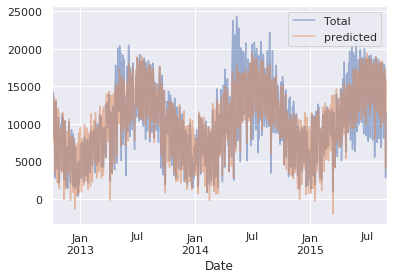

In [32]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [33]:
params = pd.Series(model.coef_, index=x.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp(C)          260.651164
annual           107.770852
dtype: float64

In [34]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(x, y)).coef_
             for i in range(1000)], 0)

In [35]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon           2020.0  345.0
Tue           2441.0  333.0
Wed           2371.0  331.0
Thu           1929.0  341.0
Fri            712.0  324.0
Sat          -4413.0  318.0
Sun          -4534.0  332.0
holiday      -4750.0  653.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  249.0
dry day       2191.0  133.0
Temp(C)        261.0   14.0
annual         108.0   71.0
